In [92]:
#importando librerias requeridas

import os
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns7
from sklearn import linear_model

In [93]:
#cargando data set
siata = pd.read_csv('estacion_data_calidadaire_4_20170301_20170331.csv')

In [94]:
#mostrando la parte superior de de la tabla
siata.head()

,fecha,codigoSerial,PM25,calidad_pm25,pm10,calidad_pm10,pm1,calidad_pm1,no,calidad_no,...,p_ssr,calidad_p_ssr,pliquida_ssr,calidad_pliquida_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
0,2017-03-01 00:00:00,4,-9999.0,1.0,63.0,1.0,-9999.0,1.0,95.0057,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
1,2017-03-01 01:00:00,4,-9999.0,1.0,48.0,1.0,-9999.0,1.0,48.0926,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
2,2017-03-01 02:00:00,4,-9999.0,1.0,33.0,1.0,-9999.0,1.0,34.7578,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
3,2017-03-01 03:00:00,4,-9999.0,1.0,38.0,1.0,-9999.0,1.0,34.4426,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
4,2017-03-01 04:00:00,4,-9999.0,1.0,34.0,1.0,-9999.0,1.0,34.1442,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0


In [95]:
#inforacion basica de la tabla
siata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 36 columns):
fecha                   744 non-null object
codigoSerial            744 non-null int64
PM25                    744 non-null float64
calidad_pm25            744 non-null float64
pm10                    744 non-null float64
calidad_pm10            744 non-null float64
pm1                     744 non-null float64
calidad_pm1             744 non-null float64
no                      744 non-null float64
calidad_no              744 non-null float64
no2                     744 non-null float64
calidad_no2             744 non-null float64
NOX                     744 non-null float64
calidad_nox             744 non-null float64
ozono                   744 non-null float64
calidad_ozono           744 non-null float64
co                      744 non-null float64
calidad_co              744 non-null float64
so2                     744 non-null float64
calidad_so2             744 non-null float6

In [96]:
#contando PM25
siata['PM25'].value_counts()

-9999.0    744
Name: PM25, dtype: int64

In [97]:
#contando pm10
siata['pm10'].value_counts()

41.0     21
29.0     21
28.0     21
37.0     20
34.0     20
         ..
12.0      1
107.0     1
81.0      1
82.0      1
101.0     1
Name: pm10, Length: 113, dtype: int64

In [98]:
#contando NOx
siata['NOX'].value_counts()

-9999.0000    9
 64.7543      1
 32.2086      1
 101.7790     1
 55.5001      1
             ..
 45.3747      1
 24.4607      1
 23.3254      1
 90.1708      1
 32.8493      1
Name: NOX, Length: 736, dtype: int64

In [99]:
##contando SO2
siata['so2'].value_counts()

-9999.0    744
Name: so2, dtype: int64

In [100]:
#contando ozono
siata['ozono'].value_counts()

-9999.0    744
Name: ozono, dtype: int64

In [101]:
# talba pivote de concentracion del PM10 por dia del mes de marzo
siata_pivote_pm10=pd.pivot_table(siata, 'pm10',['fecha'])
siata_pivote_pm10

,pm10
fecha,
2017-03-01 00:00:00,63.0
2017-03-01 01:00:00,48.0
2017-03-01 02:00:00,33.0
2017-03-01 03:00:00,38.0
2017-03-01 04:00:00,34.0
...,...
2017-03-31 19:00:00,37.0
2017-03-31 20:00:00,39.0
2017-03-31 21:00:00,35.0


In [102]:
# talba pivote de concentracion del PM25 por dia del mes de marzo
siata_pivote_pm25=pd.pivot_table(siata, 'PM25',['fecha'])
siata_pivote_pm25

,PM25
fecha,
2017-03-01 00:00:00,-9999.0
2017-03-01 01:00:00,-9999.0
2017-03-01 02:00:00,-9999.0
2017-03-01 03:00:00,-9999.0
2017-03-01 04:00:00,-9999.0
...,...
2017-03-31 19:00:00,-9999.0
2017-03-31 20:00:00,-9999.0
2017-03-31 21:00:00,-9999.0


In [103]:
# talba pivote de concentracion del NOX por dia del mes de marzo
siata_pivote_NOX=pd.pivot_table(siata, 'NOX',['fecha'])
siata_pivote_NOX

,NOX
fecha,
2017-03-01 00:00:00,111.3390
2017-03-01 01:00:00,61.9292
2017-03-01 02:00:00,45.2843
2017-03-01 03:00:00,44.1751
2017-03-01 04:00:00,41.9300
...,...
2017-03-31 19:00:00,62.8103
2017-03-31 20:00:00,73.5357
2017-03-31 21:00:00,50.7660


In [104]:
# talba pivote de concentracion del NO2 por dia del mes de marzo
siata_pivote_no2=pd.pivot_table(siata, 'no2',['fecha'])
siata_pivote_no2

,no2
fecha,
2017-03-01 00:00:00,15.85690
2017-03-01 01:00:00,13.47360
2017-03-01 02:00:00,10.39640
2017-03-01 03:00:00,9.58667
2017-03-01 04:00:00,7.60264
...,...
2017-03-31 19:00:00,24.60030
2017-03-31 20:00:00,23.27190
2017-03-31 21:00:00,20.77260


In [105]:
# talba pivote de concentracion del NO por dia del mes de marzo
siata_pivote_co=pd.pivot_table(siata, 'co',['fecha'])
siata_pivote_co

,co
fecha,
2017-03-01 00:00:00,-9999.0
2017-03-01 01:00:00,-9999.0
2017-03-01 02:00:00,-9999.0
2017-03-01 03:00:00,-9999.0
2017-03-01 04:00:00,-9999.0
...,...
2017-03-31 19:00:00,-9999.0
2017-03-31 20:00:00,-9999.0
2017-03-31 21:00:00,-9999.0


In [106]:
# talba pivote de concentracion del PM25 por dia del mes de marzo
siata_pivote_pm1=pd.pivot_table(siata, 'pm1',['fecha'])
siata_pivote_pm1


,pm1
fecha,
2017-03-01 00:00:00,-9999.0
2017-03-01 01:00:00,-9999.0
2017-03-01 02:00:00,-9999.0
2017-03-01 03:00:00,-9999.0
2017-03-01 04:00:00,-9999.0
...,...
2017-03-31 19:00:00,-9999.0
2017-03-31 20:00:00,-9999.0
2017-03-31 21:00:00,-9999.0


In [107]:
# talba pivote de concentracion del NO por dia del mes de marzo
siata_pivote_no=pd.pivot_table(siata, 'no',['fecha'])
siata_pivote_no

,no
fecha,
2017-03-01 00:00:00,95.0057
2017-03-01 01:00:00,48.0926
2017-03-01 02:00:00,34.7578
2017-03-01 03:00:00,34.4426
2017-03-01 04:00:00,34.1442
...,...
2017-03-31 19:00:00,38.2679
2017-03-31 20:00:00,50.0978
2017-03-31 21:00:00,29.9024


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000020F8DC5F8B8> (for post_execute):


KeyboardInterrupt: 

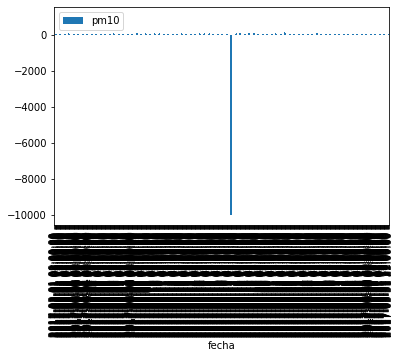

In [108]:
siata_pivote_pm10.plot(kind='bar')

<Figure size 7200x43200 with 0 Axes>

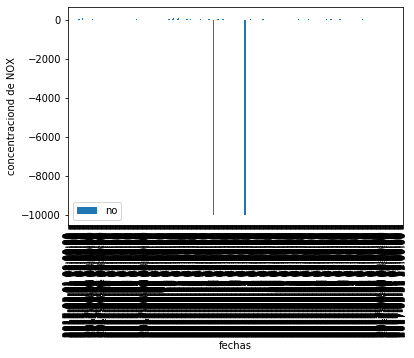

<Figure size 7200x43200 with 0 Axes>

In [109]:
siata_pivote_no.plot(kind='bar')
plt.xlabel('fechas')
plt.ylabel('concentraciond de NOX')
plt.figure(figsize=(100,600))

Text(0, 0.5, 'concentraciond de NOX')

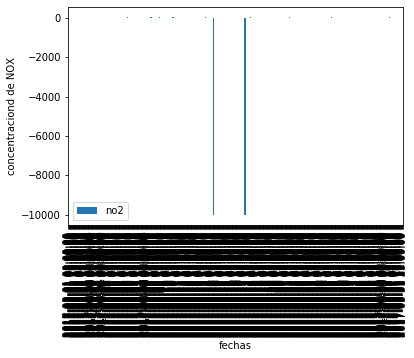

In [110]:
siata_pivote_no2.plot(kind='bar')

plt.xlabel('fechas')
plt.ylabel('concentraciond de NOX')

Text(0, 0.5, 'concentraciond de NOX')

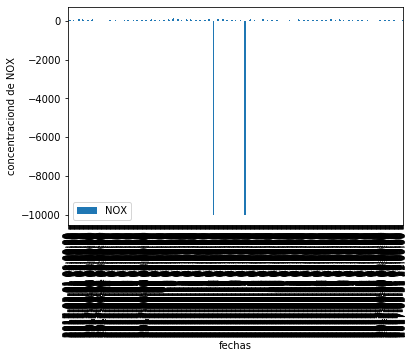

In [111]:
siata_pivote_NOX.plot(kind='bar')

plt.xlabel('fechas')
plt.ylabel('concentraciond de NOX')

(array([  9.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 735.]),
 array([-9999.    , -8978.6503, -7958.3006, -6937.9509, -5917.6012,
        -4897.2515, -3876.9018, -2856.5521, -1836.2024,  -815.8527,
          204.497 ]),
 <a list of 10 Patch objects>)

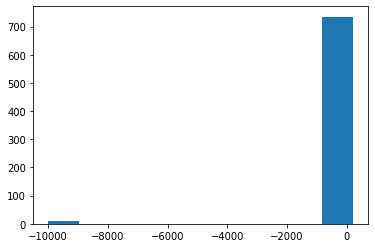

In [112]:
num_bins =10
plt.hist(siata['NOX'],num_bins)

(array([  9.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 735.]),
 array([-9999.    , -8978.6503, -7958.3006, -6937.9509, -5917.6012,
        -4897.2515, -3876.9018, -2856.5521, -1836.2024,  -815.8527,
          204.497 ]),
 <a list of 10 Patch objects>)

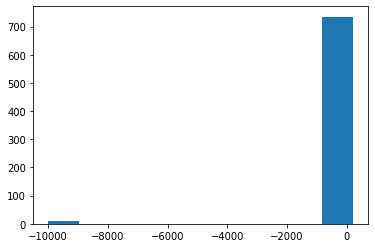

In [113]:
num_bins =10
plt.hist(siata['NOX'],num_bins)

(array([  9.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 735.]),
 array([-9999.    , -8993.6616, -7988.3232, -6982.9848, -5977.6464,
        -4972.308 , -3966.9696, -2961.6312, -1956.2928,  -950.9544,
           54.384 ]),
 <a list of 10 Patch objects>)

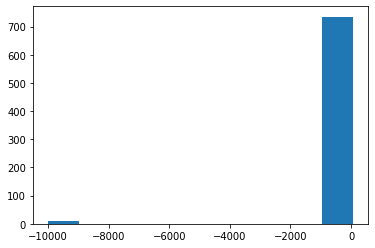

In [114]:
num_bins =10
plt.hist(siata['no2'],num_bins)

In [89]:
siata_num = siata.select_dtypes(include=('float64'))
siata_num.head()

,PM25,calidad_pm25,pm10,calidad_pm10,pm1,calidad_pm1,no,calidad_no,no2,calidad_no2,...,p_ssr,calidad_p_ssr,pliquida_ssr,calidad_pliquida_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
0,-9999.0,1.0,63.0,1.0,-9999.0,1.0,95.0057,1.0,15.85690,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
1,-9999.0,1.0,48.0,1.0,-9999.0,1.0,48.0926,1.0,13.47360,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
2,-9999.0,1.0,33.0,1.0,-9999.0,1.0,34.7578,1.0,10.39640,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
3,-9999.0,1.0,38.0,1.0,-9999.0,1.0,34.4426,1.0,9.58667,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
4,-9999.0,1.0,34.0,1.0,-9999.0,1.0,34.1442,1.0,7.60264,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F9EFFC048>,
      dtype=object)

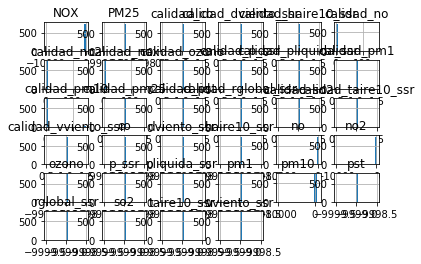

In [90]:
siata_num.hist(bins=20)

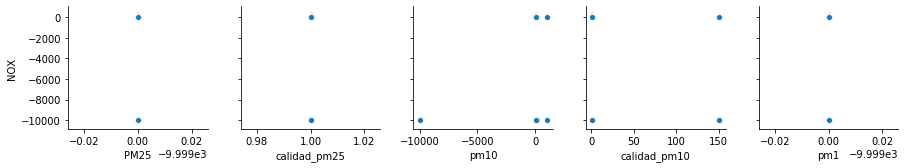

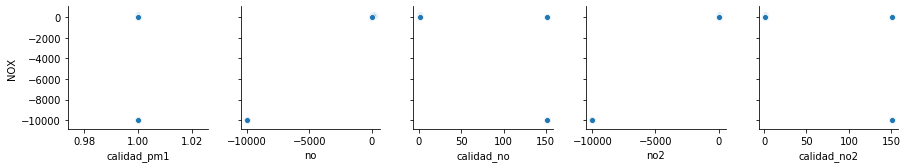

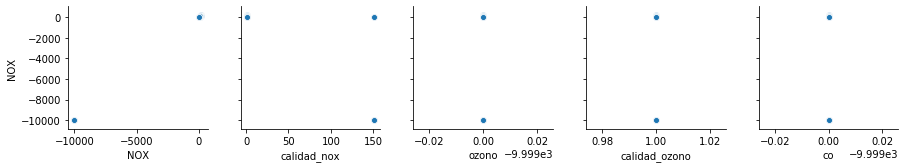

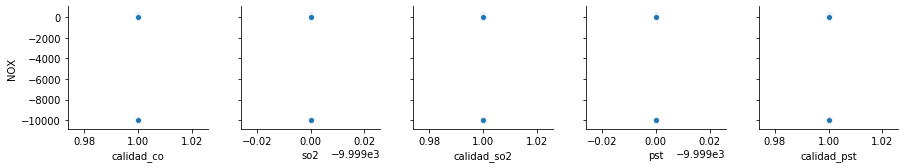

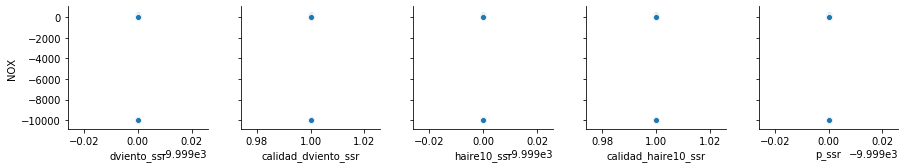

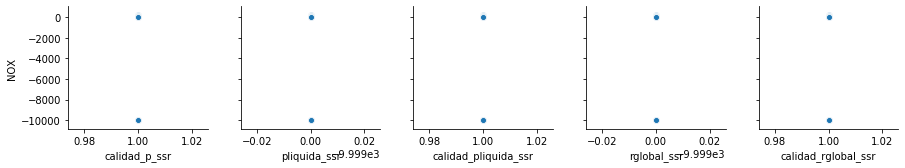

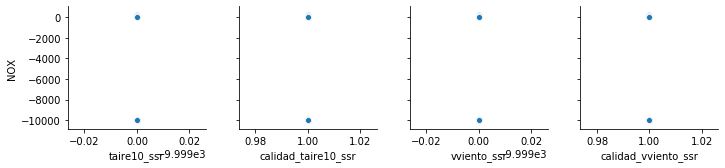

In [91]:
for i in range(0,len(siata_num.columns),5):
    sns7.pairplot(siata, y_vars=['NOX'], x_vars=siata_num.columns[i:i+5])

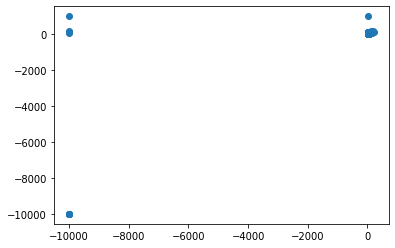

In [119]:
x=siata['NOX']
y=siata['pm10']

mymodel = py.poly1d(py.polyfit(x, y, 3))
myline = py.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()



In [122]:
siata2=pd.read_csv('estacion_data_calidadaire_4_20170401_20170430.csv')


In [123]:
siata2.head()

,Unnamed: 0,codigoSerial,pm25,calidad_pm25,pm10,calidad_pm10,pm1,calidad_pm1,no,calidad_no,...,p_ssr,calidad_p_ssr,pliquida_ssr,calidad_pliquida_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
0,2017-04-01 00:00:00,4,-9999.0,1.0,21.0,1.0,-9999.0,1.0,8.86153,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
1,2017-04-01 01:00:00,4,-9999.0,1.0,24.0,1.0,-9999.0,1.0,5.52375,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
2,2017-04-01 02:00:00,4,-9999.0,1.0,14.0,1.0,-9999.0,1.0,2.97181,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
3,2017-04-01 03:00:00,4,-9999.0,1.0,27.0,1.0,-9999.0,1.0,4.81208,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
4,2017-04-01 04:00:00,4,-9999.0,1.0,10.0,1.0,-9999.0,1.0,5.23986,1.0,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0


In [131]:
X = siata[['NOX','no2']]
y = siata['pm10']

regr = linear_model.LinearRegression()
regr.fit(x, y)

#predict the CO2 emission of a car where the weight is 2300g, and the volume is 1300ccm:
predictedpm10 = regr.predict([[111.3390, 15.85690]])

print(predictedpm10)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.11339e+02  6.19292e+01  4.52843e+01  4.41751e+01  4.19300e+01
  4.93488e+01  9.48915e+01  1.27064e+02  1.03154e+02  1.12051e+02
  7.16164e+01  6.54430e+01  3.35378e+01  2.21714e+01  1.67704e+01
  1.47725e+01  1.88443e+01  2.46825e+01  4.20775e+01  5.95553e+01
  8.35625e+01  1.01779e+02  9.97811e+01  8.45004e+01  6.51714e+01
  7.79000e+01  7.62405e+01  5.75311e+01  3.94325e+01  4.69590e+01
  6.43860e+01  9.77610e+01  1.23533e+02  8.77031e+01  5.14454e+01
  2.24222e+01  2.28993e+01  2.35956e+01  1.77493e+01  1.89772e+01
  1.97882e+01  2.18154e+01  2.32704e+01  2.87918e+01  2.77524e+01
  2.94229e+01  3.45881e+01  2.97529e+01  3.43768e+01  3.23568e+01
  3.05978e+01  2.72590e+01  3.97758e+01  4.56217e+01  8.33258e+01
  6.66933e+01  4.49017e+01  3.38703e+01  4.33382e+01  2.89406e+01
  2.81042e+01  2.11100e+01  1.89467e+01  1.93106e+01  1.94519e+01
  1.93540e+01  2.63236e+01  2.88396e+01  2.80940e+01  2.98735e+01
  2.92219e+01  1.95136e+01  1.86989e+01  1.77610e+01  1.25508e+01
  1.22972e+01  2.05301e+01  3.32831e+01  4.73256e+01  6.79371e+01
  9.35711e+01  4.57149e+01  2.15054e+01  1.87536e+01  1.58432e+01
  1.52864e+01  1.25904e+01  1.49210e+01  1.85590e+01  2.41617e+01
  2.35720e+01  2.37997e+01  2.57082e+01  2.31390e+01  2.51442e+01
  1.75703e+01  1.44589e+01  1.71182e+01  2.25010e+01  2.50192e+01
  2.44607e+01  2.36190e+01  2.11785e+01  1.91562e+01  3.38404e+01
  3.47929e+01  3.23054e+01  2.81397e+01  2.98703e+01  2.41028e+01
  2.07381e+01  1.90747e+01  2.20408e+01  2.20840e+01  2.33254e+01
  2.48247e+01  2.38604e+01  2.31319e+01  2.42543e+01  1.88950e+01
  1.84732e+01  1.67503e+01  1.52482e+01  1.94629e+01  2.30290e+01
  3.29607e+01  5.01985e+01  1.06299e+02  1.24879e+02  9.02286e+01
  7.70929e+01  7.27431e+01  4.33271e+01  3.59006e+01  3.06189e+01
  2.23935e+01  2.37074e+01  2.78272e+01  3.31064e+01  3.28493e+01
  2.73476e+01  2.16640e+01  2.07013e+01  2.28810e+01  2.25319e+01
  2.95069e+01  2.59219e+01  3.04692e+01  2.96411e+01  3.43983e+01
  4.73037e+01  9.08944e+01  7.00640e+01  5.99876e+01  3.33676e+01
  2.99406e+01  3.32796e+01  3.05349e+01  2.30494e+01  2.38713e+01
  4.66976e+01  4.49250e+01  3.51599e+01  3.88067e+01  4.29256e+01
  3.92289e+01  3.16808e+01  3.22086e+01  3.20404e+01  2.78971e+01
  2.87640e+01  3.14675e+01  3.09049e+01  3.19046e+01  4.84321e+01
  5.49938e+01  7.43400e+01  8.06432e+01  6.13561e+01  8.16525e+01
  4.55392e+01  8.59968e+01  8.22558e+01  6.86181e+01  7.32411e+01
  7.93319e+01  9.06947e+01  1.57501e+02  1.21688e+02  6.77104e+01
  5.10465e+01  4.86862e+01  3.50603e+01  3.35075e+01  4.89860e+01
  3.88047e+01  3.72192e+01  4.13146e+01  7.24899e+01  1.14406e+02
  1.06228e+02  1.01753e+02  1.06737e+02  6.37879e+01  2.60493e+01
  1.69740e+01  1.28010e+01  1.86272e+01  2.42945e+01  3.76021e+01
  4.99703e+01  3.93693e+01  5.44794e+01  3.59853e+01  5.45386e+01
  6.47543e+01  5.09261e+01  5.49367e+01  4.87719e+01  4.42304e+01
  4.92189e+01  5.15668e+01  6.35133e+01  1.04659e+02  9.63639e+01
  7.30353e+01  8.52797e+01  5.38708e+01  4.16503e+01  4.59793e+01
  4.21060e+01  7.43522e+01  7.63810e+01  9.83401e+01  1.37288e+02
  1.88701e+02  2.04497e+02  1.72569e+02  1.37924e+02  1.54989e+02
  1.42313e+02  1.24111e+02  9.66754e+01  9.60860e+01  1.01771e+02
  1.13244e+02  1.26470e+02  1.42879e+02  1.34616e+02  9.17149e+01
  6.93385e+01  7.25075e+01  3.69965e+01  2.06769e+01  2.23908e+01
  2.05028e+01  3.89203e+01  4.33592e+01  5.05915e+01  4.02358e+01
  6.40992e+01  6.15957e+01  5.66206e+01  8.62161e+01  8.12968e+01
  6.78099e+01  5.54936e+01  4.48240e+01  5.35049e+01  6.25344e+01
  6.58118e+01  8.16824e+01  9.03375e+01  7.17600e+01  5.92685e+01
  5.23996e+01  3.98121e+01  4.11729e+01  2.60560e+01  2.66794e+01
  2.94189e+01  2.92680e+01  4.90308e+01  5.38976e+01  3.54229e+01
  3.32186e+01  3.57665e+01  2.68601e+01  2.29406e+01  2.10462e+01
  2.36267e+01  2.21028e+01  2.41558e+01  4.10383e+01  6.42196e+01
  1.33445e+02  9.01708e+01  6.17324e+01  6.76164e+01  5.38736e+01
  4.60178e+01  3.22975e+01  2.62644e+01  3.89325e+01  7.34583e+01
  7.23104e+01  9.12600e+01  1.31539e+02  6.22343e+01  6.55169e+01
  8.46076e+01  1.02633e+02  8.50068e+01  8.88260e+01  7.59622e+01
  4.49385e+01  4.92022e+01  4.83775e+01  7.87262e+01  1.42613e+02
  1.33184e+02  8.45074e+01 -9.99900e+03 -9.99900e+03  2.17946e+01
  2.32350e+01  2.43279e+01  2.83171e+01  2.77842e+01  3.49671e+01
  5.49987e+01  1.06653e+02  9.98629e+01  1.14936e+02  1.13335e+02
  1.04769e+02  8.67250e+01  5.74254e+01  2.91426e+01  2.79206e+01
  2.79090e+01  3.48128e+01  5.05275e+01  7.51947e+01  9.95044e+01
  8.16783e+01  5.45537e+01  4.14386e+01  4.38324e+01  3.19526e+01
  2.91014e+01  3.41036e+01  2.73543e+01  3.58789e+01  4.03908e+01
  6.07278e+01  6.57558e+01  7.69504e+01  9.73124e+01  1.38864e+02
  1.12435e+02  4.43919e+01  3.61226e+01  3.29933e+01  3.35168e+01
  3.94801e+01  6.20949e+01  8.96000e+01  9.20736e+01  9.43446e+01
  6.79767e+01  3.45401e+01  2.78426e+01  2.09599e+01  1.74583e+01
  1.83336e+01  1.53518e+01  2.00276e+01  3.30824e+01  3.17638e+01
  2.74904e+01  2.58942e+01  2.76683e+01  2.44443e+01  1.36575e+01
  1.25164e+01  1.90640e+01  9.06069e+00  1.29011e+01  1.44876e+01
  6.38846e+01 -9.99900e+03 -9.99900e+03 -9.99900e+03 -9.99900e+03
  1.38885e+01  8.93236e+00  2.00481e+01  1.82264e+01  1.25581e+01
  1.50639e+01  2.18563e+01  2.59353e+01  4.25533e+01  9.77722e+01
  1.14293e+02  1.00397e+02  3.71715e+01  2.36750e+01  1.56378e+01
  1.20728e+01  1.12842e+01  2.27143e+01  3.51558e+01  4.28008e+01
  5.55001e+01  6.33599e+01  3.80172e+01  3.02565e+01  2.60311e+01
  2.52475e+01  2.30893e+01  2.58208e+01  2.07663e+01  2.15442e+01
  2.19390e+01  2.38460e+01  4.75560e+01  8.34779e+01  9.26676e+01
  1.21969e+02  1.05104e+02  8.98846e+01  7.62953e+01  7.71808e+01
  7.44165e+01  7.31149e+01  6.96124e+01  3.17731e+01  4.11181e+01
  5.36149e+01  4.06915e+01  2.71517e+01  2.61197e+01  2.01401e+01
  2.04578e+01  2.15819e+01  2.36640e+01  2.29758e+01  2.33839e+01
  2.14301e+01  2.17039e+01  3.36656e+01  2.90733e+01  3.39386e+01
  3.92663e+01  5.38949e+01  4.98407e+01  2.71087e+01  2.96310e+01
  4.04210e+01  3.66989e+01  4.27111e+01  4.54710e+01  3.69461e+01
  2.38701e+01  2.20199e+01  1.69378e+01  1.60163e+01  1.50382e+01
  1.47482e+01  1.52726e+01  1.92275e+01  1.97264e+01  2.12771e+01
  1.90156e+01  1.95478e+01  1.77943e+01  2.08004e+01  2.43761e+01
  1.82543e+01  1.56010e+01  1.12565e+01  1.23860e+01  1.56282e+01
  2.20124e+01  3.24153e+01  5.87072e+01  6.70253e+01  8.11349e+01
  5.33242e+01  5.32878e+01  4.23315e+01  2.59517e+01  1.52653e+01
  1.56671e+01  1.80689e+01  2.37274e+01  2.68604e+01  3.40035e+01
  3.28594e+01  2.75828e+01  2.06218e+01  1.46511e+01  1.44603e+01
  8.47264e+00  7.27347e+00  9.06181e+00  1.19626e+01  1.72868e+01
  5.49499e+01  1.06109e+02  1.05152e+02  6.51233e+01  4.81521e+01
  3.04418e+01  3.47149e+01  3.05839e+01  2.48153e+01  2.68008e+01
  2.95090e+01  4.36478e+01  4.02354e+01  3.76362e+01  3.14779e+01
  3.19547e+01  3.55603e+01  3.75357e+01  1.99058e+01  1.90897e+01
  1.95221e+01  2.32214e+01  3.13546e+01  2.75805e+01  6.05333e+01
  1.21497e+02  1.15915e+02  8.92086e+01  5.11485e+01  3.29565e+01
  2.41389e+01  4.16567e+01  3.28043e+01  2.36603e+01  2.76843e+01
  2.52536e+01  3.02267e+01  3.53178e+01  3.11533e+01  2.80947e+01
  3.08421e+01  3.67515e+01  4.13575e+01  4.34485e+01  4.30722e+01
  4.16843e+01  4.11465e+01  5.65075e+01  8.12039e+01  1.26079e+02
  1.07141e+02  7.87439e+01  3.23994e+01  2.90857e+01  2.74240e+01
  2.88975e+01  3.09730e+01  2.70204e+01  2.07378e+01  3.20269e+01
  4.84279e+01  3.70996e+01  3.81390e+01  6.16643e+01  7.16261e+01
  8.18974e+01  8.93942e+01  7.68378e+01  8.46506e+01  8.76708e+01
  6.52179e+01  6.46671e+01  8.12925e+01  1.06710e+02  1.37220e+02
  9.42394e+01  5.34540e+01  3.09036e+01  2.25706e+01  1.91168e+01
  1.86742e+01  1.81021e+01  1.78506e+01  3.67761e+01  4.15067e+01
  4.29936e+01  7.19372e+01  7.36892e+01  9.34586e+01  1.10639e+02
  1.14169e+02  9.46875e+01 -9.99900e+03  8.19806e+01  5.12249e+01
  6.08153e+01  4.27590e+01  4.45050e+01  3.32797e+01  2.14068e+01
  2.94072e+01  2.35600e+01  2.70318e+01  2.42972e+01  2.13644e+01
  2.00908e+01  2.76907e+01  3.03946e+01  4.91789e+01  7.36636e+01
  6.77585e+01  6.54967e+01  9.26061e+01  3.96451e+01  4.42061e+01
  3.37421e+01  3.69110e+01  3.07276e+01  2.70497e+01  3.22328e+01
  3.03547e+01  3.11082e+01  3.05100e+01  3.26643e+01  2.31747e+01
  1.84078e+01  1.63393e+01  1.19487e+01  1.08492e+01  1.16501e+01
  1.39992e+01  1.75914e+01  2.16451e+01  2.55901e+01  4.53747e+01
  4.33139e+01  2.60176e+01  1.76210e+01  2.50131e+01  2.86892e+01
  2.53319e+01  2.90551e+01  2.96901e+01  3.30921e+01  7.09072e+01
  9.06750e+01  7.14592e+01  6.83121e+01  8.54661e+01  3.88056e+01
  1.55667e+01 -9.99900e+03 -9.99900e+03  8.48083e+00  1.93393e+01
  4.59046e+01  8.48928e+01  1.31875e+02  3.52742e+01  2.83392e+01
  1.86236e+01  1.40297e+01  8.07472e+00  7.52097e+00  5.61125e+00
  9.02431e+00  7.17778e+00  3.62208e+00  1.21785e+01  3.51017e+01
  4.07736e+01  3.71531e+01  1.81031e+01  1.62787e+01  1.51651e+01
  1.42019e+01  1.14486e+01  1.00344e+01  1.28150e+01  1.47354e+01
  1.86718e+01  3.13035e+01  5.60300e+01  6.69176e+01  4.67451e+01
  5.13989e+01  9.83181e+00  1.05863e+01  1.43932e+01  6.03264e+00
  8.17569e+00  1.33175e+01  1.58892e+01  2.62878e+01  6.10724e+01
  6.80743e+01  6.33176e+01  2.85711e+01  1.85522e+01  2.21853e+01
  2.82279e+01  3.33740e+01  2.61388e+01  1.58706e+01  4.40183e+01
  7.69824e+01  8.24708e+01  9.04778e+01  5.13761e+01  3.74011e+01
  5.54257e+01  3.94076e+01  3.31235e+01  3.26617e+01  3.05163e+01
  2.88193e+01  3.75243e+01  7.00694e+01  6.32731e+01  4.03633e+01
  4.28047e+01  3.23643e+01  1.72214e+01  1.99190e+01  1.60165e+01
  2.37772e+01  2.59079e+01  4.11940e+01  2.62396e+01  6.28103e+01
  7.35357e+01  5.07660e+01  4.95433e+01  3.54089e+01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.11339e+02  6.19292e+01  4.52843e+01  4.41751e+01  4.19300e+01
  4.93488e+01  9.48915e+01  1.27064e+02  1.03154e+02  1.12051e+02
  7.16164e+01  6.54430e+01  3.35378e+01  2.21714e+01  1.67704e+01
  1.47725e+01  1.88443e+01  2.46825e+01  4.20775e+01  5.95553e+01
  8.35625e+01  1.01779e+02  9.97811e+01  8.45004e+01  6.51714e+01
  7.79000e+01  7.62405e+01  5.75311e+01  3.94325e+01  4.69590e+01
  6.43860e+01  9.77610e+01  1.23533e+02  8.77031e+01  5.14454e+01
  2.24222e+01  2.28993e+01  2.35956e+01  1.77493e+01  1.89772e+01
  1.97882e+01  2.18154e+01  2.32704e+01  2.87918e+01  2.77524e+01
  2.94229e+01  3.45881e+01  2.97529e+01  3.43768e+01  3.23568e+01
  3.05978e+01  2.72590e+01  3.97758e+01  4.56217e+01  8.33258e+01
  6.66933e+01  4.49017e+01  3.38703e+01  4.33382e+01  2.89406e+01
  2.81042e+01  2.11100e+01  1.89467e+01  1.93106e+01  1.94519e+01
  1.93540e+01  2.63236e+01  2.88396e+01  2.80940e+01  2.98735e+01
  2.92219e+01  1.95136e+01  1.86989e+01  1.77610e+01  1.25508e+01
  1.22972e+01  2.05301e+01  3.32831e+01  4.73256e+01  6.79371e+01
  9.35711e+01  4.57149e+01  2.15054e+01  1.87536e+01  1.58432e+01
  1.52864e+01  1.25904e+01  1.49210e+01  1.85590e+01  2.41617e+01
  2.35720e+01  2.37997e+01  2.57082e+01  2.31390e+01  2.51442e+01
  1.75703e+01  1.44589e+01  1.71182e+01  2.25010e+01  2.50192e+01
  2.44607e+01  2.36190e+01  2.11785e+01  1.91562e+01  3.38404e+01
  3.47929e+01  3.23054e+01  2.81397e+01  2.98703e+01  2.41028e+01
  2.07381e+01  1.90747e+01  2.20408e+01  2.20840e+01  2.33254e+01
  2.48247e+01  2.38604e+01  2.31319e+01  2.42543e+01  1.88950e+01
  1.84732e+01  1.67503e+01  1.52482e+01  1.94629e+01  2.30290e+01
  3.29607e+01  5.01985e+01  1.06299e+02  1.24879e+02  9.02286e+01
  7.70929e+01  7.27431e+01  4.33271e+01  3.59006e+01  3.06189e+01
  2.23935e+01  2.37074e+01  2.78272e+01  3.31064e+01  3.28493e+01
  2.73476e+01  2.16640e+01  2.07013e+01  2.28810e+01  2.25319e+01
  2.95069e+01  2.59219e+01  3.04692e+01  2.96411e+01  3.43983e+01
  4.73037e+01  9.08944e+01  7.00640e+01  5.99876e+01  3.33676e+01
  2.99406e+01  3.32796e+01  3.05349e+01  2.30494e+01  2.38713e+01
  4.66976e+01  4.49250e+01  3.51599e+01  3.88067e+01  4.29256e+01
  3.92289e+01  3.16808e+01  3.22086e+01  3.20404e+01  2.78971e+01
  2.87640e+01  3.14675e+01  3.09049e+01  3.19046e+01  4.84321e+01
  5.49938e+01  7.43400e+01  8.06432e+01  6.13561e+01  8.16525e+01
  4.55392e+01  8.59968e+01  8.22558e+01  6.86181e+01  7.32411e+01
  7.93319e+01  9.06947e+01  1.57501e+02  1.21688e+02  6.77104e+01
  5.10465e+01  4.86862e+01  3.50603e+01  3.35075e+01  4.89860e+01
  3.88047e+01  3.72192e+01  4.13146e+01  7.24899e+01  1.14406e+02
  1.06228e+02  1.01753e+02  1.06737e+02  6.37879e+01  2.60493e+01
  1.69740e+01  1.28010e+01  1.86272e+01  2.42945e+01  3.76021e+01
  4.99703e+01  3.93693e+01  5.44794e+01  3.59853e+01  5.45386e+01
  6.47543e+01  5.09261e+01  5.49367e+01  4.87719e+01  4.42304e+01
  4.92189e+01  5.15668e+01  6.35133e+01  1.04659e+02  9.63639e+01
  7.30353e+01  8.52797e+01  5.38708e+01  4.16503e+01  4.59793e+01
  4.21060e+01  7.43522e+01  7.63810e+01  9.83401e+01  1.37288e+02
  1.88701e+02  2.04497e+02  1.72569e+02  1.37924e+02  1.54989e+02
  1.42313e+02  1.24111e+02  9.66754e+01  9.60860e+01  1.01771e+02
  1.13244e+02  1.26470e+02  1.42879e+02  1.34616e+02  9.17149e+01
  6.93385e+01  7.25075e+01  3.69965e+01  2.06769e+01  2.23908e+01
  2.05028e+01  3.89203e+01  4.33592e+01  5.05915e+01  4.02358e+01
  6.40992e+01  6.15957e+01  5.66206e+01  8.62161e+01  8.12968e+01
  6.78099e+01  5.54936e+01  4.48240e+01  5.35049e+01  6.25344e+01
  6.58118e+01  8.16824e+01  9.03375e+01  7.17600e+01  5.92685e+01
  5.23996e+01  3.98121e+01  4.11729e+01  2.60560e+01  2.66794e+01
  2.94189e+01  2.92680e+01  4.90308e+01  5.38976e+01  3.54229e+01
  3.32186e+01  3.57665e+01  2.68601e+01  2.29406e+01  2.10462e+01
  2.36267e+01  2.21028e+01  2.41558e+01  4.10383e+01  6.42196e+01
  1.33445e+02  9.01708e+01  6.17324e+01  6.76164e+01  5.38736e+01
  4.60178e+01  3.22975e+01  2.62644e+01  3.89325e+01  7.34583e+01
  7.23104e+01  9.12600e+01  1.31539e+02  6.22343e+01  6.55169e+01
  8.46076e+01  1.02633e+02  8.50068e+01  8.88260e+01  7.59622e+01
  4.49385e+01  4.92022e+01  4.83775e+01  7.87262e+01  1.42613e+02
  1.33184e+02  8.45074e+01 -9.99900e+03 -9.99900e+03  2.17946e+01
  2.32350e+01  2.43279e+01  2.83171e+01  2.77842e+01  3.49671e+01
  5.49987e+01  1.06653e+02  9.98629e+01  1.14936e+02  1.13335e+02
  1.04769e+02  8.67250e+01  5.74254e+01  2.91426e+01  2.79206e+01
  2.79090e+01  3.48128e+01  5.05275e+01  7.51947e+01  9.95044e+01
  8.16783e+01  5.45537e+01  4.14386e+01  4.38324e+01  3.19526e+01
  2.91014e+01  3.41036e+01  2.73543e+01  3.58789e+01  4.03908e+01
  6.07278e+01  6.57558e+01  7.69504e+01  9.73124e+01  1.38864e+02
  1.12435e+02  4.43919e+01  3.61226e+01  3.29933e+01  3.35168e+01
  3.94801e+01  6.20949e+01  8.96000e+01  9.20736e+01  9.43446e+01
  6.79767e+01  3.45401e+01  2.78426e+01  2.09599e+01  1.74583e+01
  1.83336e+01  1.53518e+01  2.00276e+01  3.30824e+01  3.17638e+01
  2.74904e+01  2.58942e+01  2.76683e+01  2.44443e+01  1.36575e+01
  1.25164e+01  1.90640e+01  9.06069e+00  1.29011e+01  1.44876e+01
  6.38846e+01 -9.99900e+03 -9.99900e+03 -9.99900e+03 -9.99900e+03
  1.38885e+01  8.93236e+00  2.00481e+01  1.82264e+01  1.25581e+01
  1.50639e+01  2.18563e+01  2.59353e+01  4.25533e+01  9.77722e+01
  1.14293e+02  1.00397e+02  3.71715e+01  2.36750e+01  1.56378e+01
  1.20728e+01  1.12842e+01  2.27143e+01  3.51558e+01  4.28008e+01
  5.55001e+01  6.33599e+01  3.80172e+01  3.02565e+01  2.60311e+01
  2.52475e+01  2.30893e+01  2.58208e+01  2.07663e+01  2.15442e+01
  2.19390e+01  2.38460e+01  4.75560e+01  8.34779e+01  9.26676e+01
  1.21969e+02  1.05104e+02  8.98846e+01  7.62953e+01  7.71808e+01
  7.44165e+01  7.31149e+01  6.96124e+01  3.17731e+01  4.11181e+01
  5.36149e+01  4.06915e+01  2.71517e+01  2.61197e+01  2.01401e+01
  2.04578e+01  2.15819e+01  2.36640e+01  2.29758e+01  2.33839e+01
  2.14301e+01  2.17039e+01  3.36656e+01  2.90733e+01  3.39386e+01
  3.92663e+01  5.38949e+01  4.98407e+01  2.71087e+01  2.96310e+01
  4.04210e+01  3.66989e+01  4.27111e+01  4.54710e+01  3.69461e+01
  2.38701e+01  2.20199e+01  1.69378e+01  1.60163e+01  1.50382e+01
  1.47482e+01  1.52726e+01  1.92275e+01  1.97264e+01  2.12771e+01
  1.90156e+01  1.95478e+01  1.77943e+01  2.08004e+01  2.43761e+01
  1.82543e+01  1.56010e+01  1.12565e+01  1.23860e+01  1.56282e+01
  2.20124e+01  3.24153e+01  5.87072e+01  6.70253e+01  8.11349e+01
  5.33242e+01  5.32878e+01  4.23315e+01  2.59517e+01  1.52653e+01
  1.56671e+01  1.80689e+01  2.37274e+01  2.68604e+01  3.40035e+01
  3.28594e+01  2.75828e+01  2.06218e+01  1.46511e+01  1.44603e+01
  8.47264e+00  7.27347e+00  9.06181e+00  1.19626e+01  1.72868e+01
  5.49499e+01  1.06109e+02  1.05152e+02  6.51233e+01  4.81521e+01
  3.04418e+01  3.47149e+01  3.05839e+01  2.48153e+01  2.68008e+01
  2.95090e+01  4.36478e+01  4.02354e+01  3.76362e+01  3.14779e+01
  3.19547e+01  3.55603e+01  3.75357e+01  1.99058e+01  1.90897e+01
  1.95221e+01  2.32214e+01  3.13546e+01  2.75805e+01  6.05333e+01
  1.21497e+02  1.15915e+02  8.92086e+01  5.11485e+01  3.29565e+01
  2.41389e+01  4.16567e+01  3.28043e+01  2.36603e+01  2.76843e+01
  2.52536e+01  3.02267e+01  3.53178e+01  3.11533e+01  2.80947e+01
  3.08421e+01  3.67515e+01  4.13575e+01  4.34485e+01  4.30722e+01
  4.16843e+01  4.11465e+01  5.65075e+01  8.12039e+01  1.26079e+02
  1.07141e+02  7.87439e+01  3.23994e+01  2.90857e+01  2.74240e+01
  2.88975e+01  3.09730e+01  2.70204e+01  2.07378e+01  3.20269e+01
  4.84279e+01  3.70996e+01  3.81390e+01  6.16643e+01  7.16261e+01
  8.18974e+01  8.93942e+01  7.68378e+01  8.46506e+01  8.76708e+01
  6.52179e+01  6.46671e+01  8.12925e+01  1.06710e+02  1.37220e+02
  9.42394e+01  5.34540e+01  3.09036e+01  2.25706e+01  1.91168e+01
  1.86742e+01  1.81021e+01  1.78506e+01  3.67761e+01  4.15067e+01
  4.29936e+01  7.19372e+01  7.36892e+01  9.34586e+01  1.10639e+02
  1.14169e+02  9.46875e+01 -9.99900e+03  8.19806e+01  5.12249e+01
  6.08153e+01  4.27590e+01  4.45050e+01  3.32797e+01  2.14068e+01
  2.94072e+01  2.35600e+01  2.70318e+01  2.42972e+01  2.13644e+01
  2.00908e+01  2.76907e+01  3.03946e+01  4.91789e+01  7.36636e+01
  6.77585e+01  6.54967e+01  9.26061e+01  3.96451e+01  4.42061e+01
  3.37421e+01  3.69110e+01  3.07276e+01  2.70497e+01  3.22328e+01
  3.03547e+01  3.11082e+01  3.05100e+01  3.26643e+01  2.31747e+01
  1.84078e+01  1.63393e+01  1.19487e+01  1.08492e+01  1.16501e+01
  1.39992e+01  1.75914e+01  2.16451e+01  2.55901e+01  4.53747e+01
  4.33139e+01  2.60176e+01  1.76210e+01  2.50131e+01  2.86892e+01
  2.53319e+01  2.90551e+01  2.96901e+01  3.30921e+01  7.09072e+01
  9.06750e+01  7.14592e+01  6.83121e+01  8.54661e+01  3.88056e+01
  1.55667e+01 -9.99900e+03 -9.99900e+03  8.48083e+00  1.93393e+01
  4.59046e+01  8.48928e+01  1.31875e+02  3.52742e+01  2.83392e+01
  1.86236e+01  1.40297e+01  8.07472e+00  7.52097e+00  5.61125e+00
  9.02431e+00  7.17778e+00  3.62208e+00  1.21785e+01  3.51017e+01
  4.07736e+01  3.71531e+01  1.81031e+01  1.62787e+01  1.51651e+01
  1.42019e+01  1.14486e+01  1.00344e+01  1.28150e+01  1.47354e+01
  1.86718e+01  3.13035e+01  5.60300e+01  6.69176e+01  4.67451e+01
  5.13989e+01  9.83181e+00  1.05863e+01  1.43932e+01  6.03264e+00
  8.17569e+00  1.33175e+01  1.58892e+01  2.62878e+01  6.10724e+01
  6.80743e+01  6.33176e+01  2.85711e+01  1.85522e+01  2.21853e+01
  2.82279e+01  3.33740e+01  2.61388e+01  1.58706e+01  4.40183e+01
  7.69824e+01  8.24708e+01  9.04778e+01  5.13761e+01  3.74011e+01
  5.54257e+01  3.94076e+01  3.31235e+01  3.26617e+01  3.05163e+01
  2.88193e+01  3.75243e+01  7.00694e+01  6.32731e+01  4.03633e+01
  4.28047e+01  3.23643e+01  1.72214e+01  1.99190e+01  1.60165e+01
  2.37772e+01  2.59079e+01  4.11940e+01  2.62396e+01  6.28103e+01
  7.35357e+01  5.07660e+01  4.95433e+01  3.54089e+01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()